In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [5]:
df = sns.load_dataset("diamonds")

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


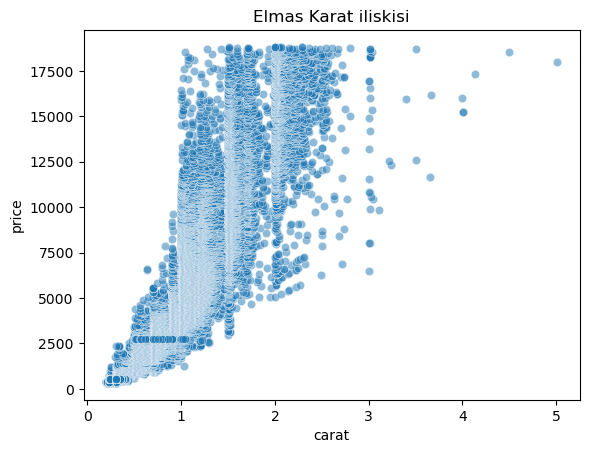

In [10]:
sns.scatterplot(x="carat",y="price",data=df,alpha=0.5)
plt.title("Elmas Karat iliskisi")
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [11]:
X = df[["carat"]]
y = df[["price"]]

In [12]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [13]:
y_pred = model.predict(X)

In [14]:
mse = mean_squared_error(y,y_pred)

In [15]:
rmse=np.sqrt(mse)
r2 = r2_score(y,y_pred)

In [17]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Squared Error: {r2:.2f}")

Mean Squared Error: 2397955.05
Root Mean Squared Error: 1548.53
R2 Squared Error: 0.85


In [19]:
new_diamond = [[1.5]] #1.5 caratlik elmas
tahmini_fiyat = model.predict(new_diamond)[0]
print(f"1.5 karat elmas icin tahmini fiyat : {tahmini_fiyat[0]:.2f} $")

1.5 karat elmas icin tahmini fiyat : 9378.28 $


/Users/gokturkberkekorkut/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Logistic Regression

### Diabete Prediction with Logistic Regression

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [23]:
def outlier_threshold(df,col,q1=0.05,q3=0.95):
    q1_val = df[col].quantile(q1)
    q3_val = df[col].quantile(q3)
    iqr = q3_val - q1_val
    low_limit = q1_val - 1.5 *iqr
    upper_limit = q3_val + 1.5 * iqr
    return low_limit,upper_limit

In [24]:
def replace_with_thresholds(df,col):
    low, up = outlier_thresholds(df,col)
    df[col] = np.where(df[col] < low , low , np.where(df[col] > up,up,df[col]))